In [1]:
#c.InteractiveShellApp.extensions = ['https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py']
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
#%load_ext autotime

In [2]:
"""
The goal is to be able to produce meaningful plots of the raw data!
"""
PATH_PROFILES = "/home/mila/teaching/user07/Train/Profile/Profile.csv"
PATH_LIWC="/home/mila/teaching/user07/Train/Text/liwc.csv"
PATH_NRC="/home/mila/teaching/user07/Train/Text/nrc.csv"
PATH_LIKES="/home/mila/teaching/user07/Train/Relation/Relation.csv"
PATH_IMAGES="/home/mila/teaching/user07/Train/Image/oxford.csv"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [3]:
profiles = pd.read_csv(PATH_PROFILES)
#liwc = pd.read_csv(PATH_LIWC)
#nrc = pd.read_csv(PATH_NRC)
#rel = pd.read_csv(PATH_LIKES)
#oxford = pd.read_csv(PATH_IMAGES)

In [4]:
#liwc = liwc.rename(columns={"userId":"userid"})
#oxford = oxford.rename(columns={"userId":"userid"})
#nrc = nrc.rename(columns={"userId":"userid"})
profiles = profiles.rename(columns={"userId":"userid"})
#rel = rel.rename(columns={"userId":"userid"})

def age_group_id(age_str: str) -> int:
        """Returns the age group category ID (an integer from 0 to 3) for the given age (string)

        Arguments:
            age_str {str} -- the age

        Returns:
            int -- the ID of the age group: 0 for xx-24, 1 for 25-34, 2 for 35-49 and 3 for 50-xx.
        """
        age = int(age_str)
        if age <= 24:
            return 0
        elif age <= 34:
            return 1
        elif age <= 49:
            return 2
        else:
            return 3

#profiles.describe()

#profiles.age_gr.describe()

In [5]:
profiles['age_gr']=profiles.age.apply(age_group_id)
profiles=profiles.drop(['Unnamed: 0'], axis=1)
profiles=profiles.set_index('userid')

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import os


def age_group_string(age_group_id: int) -> str:
    """returns the string for the age group:
    either "xx-24", "25-34", "35-49", or "50-xx"
    """
    age_group_strings = ["xx-24", "25-34", "35-49", "50-xx"]
    return age_group_strings[age_group_id]



def matrix_no_cutt(data_dir='~/Train'): #, k=100, threshold=0.5):
    '''
    Purpose: get list of likes to keep as features
    Input:
        data_dir {str} : the parent input directory
        k {int} : the number of likes to keep as features,
                        starting from those with highest frequencies
        (optional) threshold {float} : the minimum variance criteria
    Output:
        high_var {List of strings}: width-wise truncated dataframe of likes with columns sorted by descending variance, indexed by like_id
    '''

    #path="/home/rd/PycharmProjects/UdeM/6758/project" #rd local
    path=os.path.join(data_dir, "Relation") #server

    relation = pd.read_csv(os.path.join(path, "Relation.csv"))#, index_col=0)
    #relation = pd.read_csv(os.path.join(path, "dummyRel.csv"))#, index_col=0)
    relation = relation.drop(['Unnamed: 0'], axis=1)
    relation['value']=1
    #columns=relation.loc[:, 'like_id'].unique()
    #print(len(columns))
    matrix_rel=relation.pivot_table(index=['userid'], columns=['like_id'])['value'].fillna(0).astype(int)
    #matrix_rel['age_gr']=profiles.age_gr
    #profiles = profiles.rename(columns={"userId":"userid"})
    matrix_rel.to_pickle('likes.pkl')
    return matrix_rel
    #truncated.to_csv(os.path.join(path, "trunk_rel.csv"), header=True)
    
    #cutoff=matrix_rel.std()
    ##t,p=stats.ttest_ind((matrix_rel))
    #truncated=matrix_rel.loc[:, cutoff > threshold]
    ##print(truncated)#,t,p)
    #truncated.to_csv(os.path.join(path, "trunk_rel.csv"), header=True)
    ##matrix_rel.to_csv(os.path.join(path, "matrix_rel.csv"), header=True)
    
    #return matrix_rel
    
def sumsort(pdarr):
    freqlikes=np.sum(pdarr, axis=0)
    freqlikes.sort_values(ascending=False,inplace=True)
    return freqlikes

def find_keywords(ar1,ar2,ar3,ar4,t=1000):
    """Compare ar1 to ar2 and ar3"""

    ar1_w=np.copy(ar1.index[:]).tolist()
    
    a=np.minimum(len(ar1),t)
    b=np.minimum(len(ar2),t)
    c=np.minimum(len(ar3),t)
    d=np.minimum(len(ar4),t)
    
    i=0
    
    while i < a:
        if (ar1.index[i] in ar2.index[:b]) or (ar1.index[i] in ar3.index[:c]) or (ar1.index[i] in ar4.index[:d]):
            del ar1_w[i]
            a-=1
            #ar1_w.pop(i)
        else:
            i+=1
    
    return ar1_w

In [7]:
a=!date +%s
# matrix_no_cutt()
b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

0 seconds


In [8]:
import pandas as pd
from scipy import sparse
a=!date +%s
#likes=pd.read_pickle('likes.pkl')
A = sparse.load_npz("likes_sparse.npz")
idx=np.load('likes_sparse_index.npy')
cols=np.load('likes_sparse_columns.npy')
B=pd.DataFrame(A.toarray().astype('int8'), columns=cols)
B['userid']=idx
likes=B.set_index('userid')

b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

240 seconds


In [9]:
#likes_x=likes_x.astype('int8')

In [10]:
a=!date +%s

likes['age_gr']=profiles.age_gr

likes_y=likes.age_gr

likes=likes.iloc[:,:-1]
#likes.drop(columns=['age_gr'])

b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

10 seconds


In [12]:
a=!date +%s

likes_gr0=likes[likes_y==0]
likes_gr1=likes[likes_y==1]
likes_gr2=likes[likes_y==2]
likes_gr3=likes[likes_y==3]


b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

11 seconds


In [13]:
def sumsort(pdarr):
    freqlikes=np.sum(pdarr, axis=0)
    #freqlikes.sort_values(ascending=False,inplace=True)
    #return freqlikes
    return freqlikes.sort_values(ascending=False,inplace=False)
    

In [14]:
a=!date +%s

freqlikes0=sumsort(likes_gr0)
freqlikes1=sumsort(likes_gr1)
freqlikes2=sumsort(likes_gr2)
freqlikes3=sumsort(likes_gr3)

freqlikes0.to_pickle('sumsorted_gr0.pkl')
freqlikes1.to_pickle('sumsorted_gr1.pkl')
freqlikes2.to_pickle('sumsorted_gr2.pkl')
freqlikes3.to_pickle('sumsorted_gr3.pkl')


b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

8 seconds


In [70]:
q=5000
#u_freqlikes0=find_keywords(freqlikes1, freqlikes0, freqlikes2, freqlikes3, t=q)
#u_freqlikes1=find_keywords(freqlikes2, freqlikes1, freqlikes0, freqlikes3, t=q)
#u_freqlikes2=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)
#u_freqlikes3=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)
u_freqlikes0

Index([       'age_gr',    260309646025,    260310722932,    260311721298,
          260313268208,    260313431287,    260313508411,    260315837388,
          260316646830,    260317868827,
       ...
       111382265546823, 111382492219082, 111382562236411, 111382908876520,
       111383045556361, 111383182235501, 111383222211505, 111383408879530,
       111383452283086,      2215974432],
      dtype='object', length=536205)

In [15]:
def find_keywords(ar1,ar2,ar3,ar4,t=1000):
    """Compare ar1 to ar2 and ar3"""

    ar1_w=np.copy(ar1.index[:]).tolist()
    
    a=np.minimum(len(ar1),t)
    b=np.minimum(len(ar2),t)
    c=np.minimum(len(ar3),t)
    d=np.minimum(len(ar4),t)
    
    i=0
    
    while i < a:
        if (ar1.index[i] in ar2.index[:b]) or (ar1.index[i] in ar3.index[:c]) or (ar1.index[i] in ar4.index[:d]):
            del ar1_w[i]
            a-=1
            #ar1_w.pop(i)
        else:
            i+=1
    
    return ar1_w

In [69]:
#create array of unique page-like
a=100
q=4400



#unique to this age group
#u_freqlikes0=find_keywords(freqlikes1, freqlikes0, freqlikes2, freqlikes3, t=q)
#u_freqlikes1=find_keywords(freqlikes2, freqlikes1, freqlikes0, freqlikes3, t=q)
#u_freqlikes2=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)
#u_freqlikes3=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)

#repeating page likes
u_freqlikes0=freqlikes0.index
u_freqlikes1=freqlikes1.index
u_freqlikes2=freqlikes2.index
u_freqlikes3=freqlikes3.index

idx_0=u_freqlikes0[a:q]
idx_1=u_freqlikes1[a:q]
idx_2=u_freqlikes2[a:q]
idx_3=u_freqlikes3[a:q]


a=np.append(idx_3,idx_2)
a=np.append(a,idx_1)
a=np.append(a,idx_0)

#convert to string
b=np.array([str(s) for s in a])

u=np.unique(b)
print(b.size, u.size)
sel_u=u[:10000]
np.save('unique_w_overlap_lower.npy', sel_u)

17200 10043


In [26]:
print(len(idx_0),len(idx_1),len(idx_2),len(idx_3))

3650 3650 3650 3650


In [34]:
#b=np.load('unique_w_overlap.npy')
#b=np.load('unique_without_overlap.npy')

sel_u=u[:10000]
su=np.array([int(s) for s in sel_u])

s_likes=likes[su]
s_likes.to_pickle('selected_likes.pkl')

s_likes_gr0=likes_gr0[su]
s_likes_gr1=likes_gr1[su]
s_likes_gr2=likes_gr2[su]
s_likes_gr3=likes_gr3[su]

In [35]:
s_freqlikes0=sumsort(s_likes_gr0)
s_freqlikes1=sumsort(s_likes_gr1)
s_freqlikes2=sumsort(s_likes_gr2)
s_freqlikes3=sumsort(s_likes_gr3)

In [36]:
s_freqlikes0.to_pickle('sel2_freq_gr0.pkl')
s_freqlikes1.to_pickle('sel2_freq_gr1.pkl')
s_freqlikes2.to_pickle('sel2_freq_gr2.pkl')
s_freqlikes3.to_pickle('sel2_freq_gr3.pkl')

In [8]:
#new_likes=s_likes.pivot_table(columns=['userid','like_id'])
#s_likes=pd.read_pickle('selected_likes.pkl')
import numpy as np
import pandas as pd

def new_rel_csv(s,df):

    s_freqlikes0=pd.read_pickle(f'{s}0.pkl')
    s_freqlikes1=pd.read_pickle(f'{s}1.pkl')
    s_freqlikes2=pd.read_pickle(f'{s}2.pkl')
    s_freqlikes3=pd.read_pickle(f'{s}3.pkl')

    k=0
    j=0
    new_likes=[]
    for u in df.index:
        for l in df.columns:
            if df.loc[u][l]==1:
                new_likes.append([str(u),str(l)])
                k+=1
        k-j
        if (k-j)>100:
            print(k)
            j=k

    return new_likes


In [10]:
s_likes=pd.read_pickle('selected_likes.pkl')
new_likes=new_rel_csv('sel_freq_gr',s_likes)
pd.DataFrame(new_likes, columns=['userid','like_id']).to_csv('new_likes_overlap.csv')

22
60
80
130
142
159
262
328
342
362
373
407
430
448
466
485
523
540
629
781
832
847
869
888
913
927
970
1035
1069
1097
1136
1156
1170
1203
1238
1249
1389
1420
1443
1454
1472
1522
1558
1624
1635
1667
1682
1697
1712
1825
1837
1856
1954
1976
2015
2033
2102
2139
2162
2185
2197
2324
2404
2542
2838
2864
2880
2896
2914
2932
2958
3033
3045
3190
3265
3285
3296
3310
3382
3396
3448
3459
3475
3511
3522
3540
3719
3786
3865
3879
3902
3913
4070
4083
4100
4116
4140
4192
4223
4258
4343
4389
4427
4438
4478
4577
4591
4606
4673
4706
4754
4813
4828
4846
4901
4917
4933
4957
4976
5004
5018
5037
5057
5094
5105
5163
5176
5282
5319
5342
5431
5479
5505
5535
5557
5619
5638
5658
5702
5716
5727
5739
5757
5776
5789
6046
6066
6083
6098
6118
6158
6204
6227
6246
6259
6279
6301
6345
6364
6408
6442
6461
6476
6523
6551
6584
6599
6658
6706
6720
6739
6818
6833
6885
6924
6944
6978
7015
7068
7083
7111
7162
7178
7190
7218
7231
7276
7298
7368
7380
7418
7453
7478
7513
7534
7554
7568
7589
7765
7780
7847
7867
7906
7924
7944
7977


57863
57875
57895
57909
58094
58111
58133
58267
58296
58363
58445
58463
58528
58551
58592
58615
58651
58763
58863
58891
58916
58942
58959
58999
59033
59055
59088
59132
59162
59174
59189
59367
59388
59403
59415
59477
59508
59529
59550
59583
59649
59665
59677
59692
59753
59767
59898
59910
59927
59946
59957
60006
60027
60089
60101
60144
60162
60182
60281
60314
60336
60356
60386
60422
60502
60549
60582
60606
60623
60635
60668
60702
60732
60756
60771
60782
60805
60818
61193
61206
61218
61230
61249
61269
61288
61398
61432
61473
61492
61512
61555
61567
61578
61717
61759
61829
61848
61894
61959
61970
62035
62130
62298
62343
62386
62472
62519
62545
62558
62578
62669
62695
62719
62786
62831
62843
62863
63030
63056
63069
63123
63156
63173
63223
63239
63266
63327
63379
63467
63508
63535
63570
63595
63617
63640
63728
63763
63784
63799
63810
63858
63876
63920
63952
63972
63984
64047
64275
64288
64307
64320
64353
64446
64471
64519
64562
64588
64613
64638
64662
64676
64864
64875
64928
64942
64979
6504

114238
114321
114339
114369
114413
114432
114477
114489
114506
114532
114674
114686
114700
114760
114771
114903
114914
114978
115030
115043
115077
115119
115155
115181
115201
115226
115289
115309
115542
115566
115611
115648
115666
115680
115810
115823
115894
115930
116014
116152
116166
116190
116216
116232
116243
116465
116486
116521
116536
116640
116680
116712
116732
116754
116773
116786
116885
117012
117025
117122
117144
117176
117219
117262
117278
117291
117341
117368
117431
117497
117526
117583
117651
117682
117695
117711
117826
117859
117942
117954
117976
118012
118023
118050
118063
118148
118171
118198
118215
118247
118298
118416
118482
118585
118619
118647
118661
118678
118719
118746
118758
118786
118804
118900
118914
118938
119000
119028
119049
119062
119154
119179
119201
119221
119242
119270
119347
119377
119464
119495
119506
119639
119716
119735
119748
119803
119833
119860
119874
120136
120163
120411
120435
120455
120468
120486
120541
120656
120707
120727
120760
120882
120899

165731
165880
165915
165942
165970
165995
166176
166189
166222
166299
166318
166338
166366
166377
166399
166415
166449
166468
166492
166562
166637
166662
166727
166849
166867
166890
166915
167047
167094
167116
167128
167141
167239
167283
167456
167483
167513
167555
167584
167618
167632
167652
167707
167738
167773
167851
167866
167898
167947
167971
168008
168025
168037
168062
168167
168200
168222
168238
168251
168278
168323
168339
168368
168523
168749
168762
168782
168794
168824
168971
168984
169029
169126
169143
169156
169182
169195
169212
169243
169272
169316
169390
169423
169584
169622
169807
169839
169878
169905
169916
169953
169966
170051
170066
170078
170097
170264
170305
170318
170519
170596
170691
170711
170730
170741
170761
170773
170814
170913
170926
170949
170960
170981
170992
171005
171036
171081
171115
171135
171162
171213
171245
171264
171298
171320
171335
171349
171477
171491
171505
171571
171590
171614
171663
171690
171836
171856
171869
171940
171955
171966
172116
172192

In [25]:
a=!date +%s

tot10k=sumsort(likes)
np.save('totlikes.npy',tot10k)

b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

11 seconds


In [22]:
#np.save('10klikes.npy',tot10k)

In [37]:
np.load(totlikes.npy)
tot10k.drop('age_gr', inplace=True)

tot10k=np.array(tot10k.index[:10000])
tot10k

array([112936425387489, 24609282673, 7608631709, ..., 112401075437792,
       111938278824796, 104788928960], dtype=object)

In [35]:
#likes_gr0[np.array(tot10k)]

In [42]:
tot10k_gr0=sumsort(likes_gr0[tot10k])
tot10k_gr1=sumsort(likes_gr1[tot10k])
tot10k_gr2=sumsort(likes_gr2[tot10k])
tot10k_gr3=sumsort(likes_gr3[tot10k])

In [50]:
tot10k_gr0.to_pickle('tot_freq_gr0.pkl')
tot10k_gr1.to_pickle('tot_freq_gr1.pkl')
tot10k_gr2.to_pickle('tot_freq_gr2.pkl')
tot10k_gr3.to_pickle('tot_freq_gr3.pkl')

In [ ]:
s_freqlikes0=pd.read_pickle('sel2_freq_gr0.pkl')
s_freqlikes1=pd.read_pickle('sel2_freq_gr1.pkl')
s_freqlikes2=pd.read_pickle('sel2_freq_gr2.pkl')
s_freqlikes3=pd.read_pickle('sel2_freq_gr3.pkl')

tot10k_gr0=pd.read_pickle('tot_freq_gr0.pkl')
tot10k_gr1=pd.read_pickle('tot_freq_gr1.pkl')
tot10k_gr2=pd.read_pickle('tot_freq_gr2.pkl')
tot10k_gr3=pd.read_pickle('tot_freq_gr3.pkl')

print(s_freqlikes0.size)

In [79]:
#create array of unique page-like
a=1000
q=3400



#unique to this age group
u_freqlikes0=find_keywords(freqlikes1, freqlikes0, freqlikes2, freqlikes3, t=q)
u_freqlikes1=find_keywords(freqlikes2, freqlikes1, freqlikes0, freqlikes3, t=q)
u_freqlikes2=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)
u_freqlikes3=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)

#repeating page likes
#u_freqlikes0=freqlikes0.index
#u_freqlikes1=freqlikes1.index
#u_freqlikes2=freqlikes2.index
#u_freqlikes3=freqlikes3.index

idx_0=u_freqlikes0[a:q]
idx_1=u_freqlikes1[a:q]
idx_2=u_freqlikes2[a:q]
idx_3=u_freqlikes3[a:q]


a=np.append(idx_3,idx_2)
a=np.append(a,idx_1)
a=np.append(a,idx_0)

#convert to string
b=np.array([str(s) for s in a])

u=np.unique(b)
print(b.size, u.size)
sel_u=u[:10000]
np.save('unique_w_overlap_lower.npy', sel_u)

9600 6852


In [118]:
#histo=pd.DataFrame(np.unique(b)[:10000], columns=['like_id'])
#histo.set_index('like_id', inplace=True)

sel_u=np.load('unique_without_overlap.npy')
#sel_u=np.load('unique_w_overlap_lower.npy')

sel_u=u[:10000]
su=np.array([int(s) for s in sel_u])

s_likes=likes[su]
s_likes.to_pickle('selected_likes.pkl')

s_likes_gr0=likes_gr0[su]
s_likes_gr1=likes_gr1[su]
s_likes_gr2=likes_gr2[su]
s_likes_gr3=likes_gr3[su]

#s_freqlikes0=np.sum(s_likes_gr0, axis=0)
#s_freqlikes1=np.sum(s_likes_gr1, axis=0)
#s_freqlikes2=np.sum(s_likes_gr2, axis=0)
#s_freqlikes3=np.sum(s_likes_gr3, axis=0)

s_freqlikes0=sumsort(s_likes_gr0)
s_freqlikes1=sumsort(s_likes_gr1)
s_freqlikes2=sumsort(s_likes_gr2)
s_freqlikes3=sumsort(s_likes_gr3)


#s_freqlikes0=pd.read_pickle('sel2_freq_gr0.pkl')
#s_freqlikes1=pd.read_pickle('sel2_freq_gr1.pkl')
#s_freqlikes2=pd.read_pickle('sel2_freq_gr2.pkl')
#s_freqlikes3=pd.read_pickle('sel2_freq_gr3.pkl')

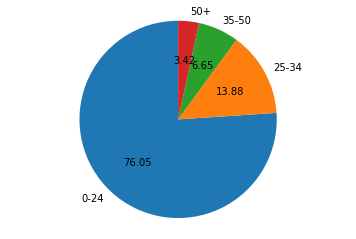

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

a=0
q=10000
num_bins = 10
Transparency=0.7

aa0=s_freqlikes0.iloc[a:q].mean()
aa1=s_freqlikes1.iloc[a:q].mean()
aa2=s_freqlikes2.iloc[a:q].mean()
aa3=s_freqlikes3.iloc[a:q].mean()

import matplotlib.pyplot as plotter
# The slice names of a population distribution pie chart

pieLabels              = ['0-24', '25-34', '35-50', '50+']

# Population data

populationShare     = [aa0,aa1,aa2,aa3]

 

figureObject, axesObject = plotter.subplots()

 

# Draw the pie chart

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()

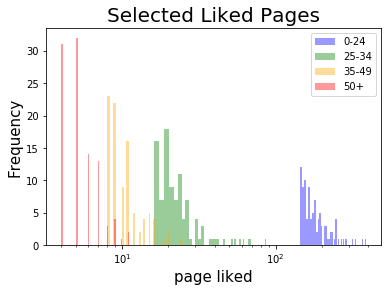

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

a=0
q=100
num_bins = 50
Transparency=0.7

aa0=s_freqlikes0.iloc[a:q]
aa1=s_freqlikes1.iloc[a:q]
aa2=s_freqlikes2.iloc[a:q]
aa3=s_freqlikes3.iloc[a:q]


#plt.hist(s_freqlikes0, num_bins, facecolor='blue', alpha=Transparency)
#plt.hist(s_freqlikes1, num_bins, facecolor='green', alpha=Transparency)
#plt.hist(s_freqlikes2, num_bins, facecolor='orange', alpha=Transparency)
#plt.hist(s_freqlikes3, num_bins, facecolor='red', alpha=Transparency)
sns.distplot(aa0[:q], num_bins, kde=False, color='blue', label='0-24')
sns.distplot(aa1[:q], num_bins, kde=False, color='green', label='25-34')
sns.distplot(aa2[:q], num_bins, kde=False, color='orange', label='35-49')
sns.distplot(aa3[:q], num_bins, kde=False, color='red', label='50+')
plt.title('Selected Liked Pages', fontsize=20)
plt.xlabel("page liked", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')
plt.legend()
plt.show()

#s_freqlikes0.hist(bins=100)
#histo['b']=freqlikes1
#histo['c']=freqlikes2
#histo['d']=freqlikes3


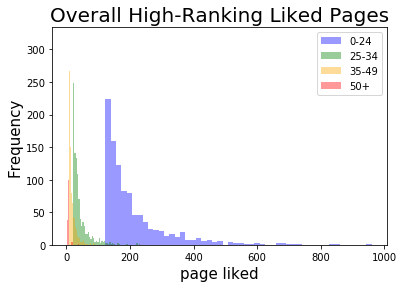

In [34]:

tot10k_gr0=pd.read_pickle('tot_freq_gr0.pkl')
tot10k_gr1=pd.read_pickle('tot_freq_gr1.pkl')
tot10k_gr2=pd.read_pickle('tot_freq_gr2.pkl')
tot10k_gr3=pd.read_pickle('tot_freq_gr3.pkl')

q=1000
num_bins = 50
Transparency=0.7
#plt.hist(tot10k_gr0, num_bins, facecolor='blue', alpha=Transparency)
#plt.hist(tot10k_gr1, num_bins, facecolor='green', alpha=Transparency)
#plt.hist(tot10k_gr2, num_bins, facecolor='orange', alpha=Transparency)
#plt.hist(tot10k_gr3, num_bins, facecolor='red', alpha=Transparency)
sns.distplot(tot10k_gr0[:q], num_bins, kde=False, color='blue', label='0-24')
sns.distplot(tot10k_gr1[:q], num_bins, kde=False, color='green', label='25-34')
sns.distplot(tot10k_gr2[:q], num_bins, kde=False, color='orange', label='35-49')
sns.distplot(tot10k_gr3[:q], num_bins, kde=False, color='red', label='50+')
plt.title('Overall High-Ranking Liked Pages', fontsize=20)
plt.xlabel("page liked", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
a=!date +%s

likes_gr0.to_pickle('likes0.pkl') #0-24
likes_gr1.to_pickle('likes1.pkl') #25-34
likes_gr2.to_pickle('likes2.pkl') #35-49
likes_gr3.to_pickle('likes3.pkl') #50+


b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

In [72]:
a=!date +%s
from sklearn.decomposition import PCA

pca = PCA(n_components=9500)
pca.fit(likes_x)  
#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

OSError: [Errno 12] Cannot allocate memory

In [ ]:
a=!date +%s

likes_t_x=pca.transform(likes_x)  
#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)



b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')


In [ ]:
print(likes_t_x.shape,likes_x.shape)

In [ ]:
likes_y.head()

In [ ]:
likes_pca_pd_x=pd.DataFrame(likes_t_x).reindex(index=likes_y.index)
#likes_pca_pd_x=pd.DataFrame(likes_t_x, index=np.array(likes_x.index))
#oxford.merge(liwc["userid"], on="userid", how='outer')

#pca_likes=pd.DataFrame(np.array([likes_t_x,profiles.age_gr.values]), index=likes_x.index)
#pca_likes = pd.concat([likes_pca_pd_x,profiles.age_gr], sort=False)

#likes_pca_pd_x.head()
likes_pca_pd_x.head

In [73]:
pca_likes.head()

,0,1,2
userid,,,
0000e06e07496624211632e8e264126c,"Index(['0000e06e07496624211632e8e264126c', '00...","[[-0.859063983324658, -0.32469361031352767, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
000235a2ba2f48231b7d24e1f08d7878,"Index(['0000e06e07496624211632e8e264126c', '00...","[[-0.859063983324658, -0.32469361031352767, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
000c4b6e2468f7d528876fd1a6dffd4c,"Index(['0000e06e07496624211632e8e264126c', '00...","[[-0.859063983324658, -0.32469361031352767, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
001187432d2a247562082cd0000dec40,"Index(['0000e06e07496624211632e8e264126c', '00...","[[-0.859063983324658, -0.32469361031352767, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
001494c3b74f124a2e3435fff17f376b,"Index(['0000e06e07496624211632e8e264126c', '00...","[[-0.859063983324658, -0.32469361031352767, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [ ]:
select_matrix=np.array([np.sum([relation.loc[:,'like_id']==j for j in ar],axis=0)>0])[0,:]
len(select_matrix)

ar=np.array(like_id_stats.sort_values(by='std',axis=0,ascending=False).head(100).index)
#print(np.array(ar))
matrix_grp=relation[select_matrix]

print(matrix_grp)

matrix_grp2 = matrix_grp.pivot_table(index=['like_id'],columns=['userid']).fillna(0).astype(int)
print(matrix_grp2)

In [ ]:
from sklearn import model_selection
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    train_features, # training features to split
    train_labels, # training labels to split
    test_size = 0.2, # between 0 and 1, proportion of sample in validation set (e.g., 0.2)
    shuffle= True,
    stratify = likes['age_gr']
    # random_state = 42  # can use to always obtain the same train/validation split
    )

In [ ]:
# Embedding in Keras

# extract multi_hot vectors for page likes features
x_train_likes = x_train.iloc[:, 156:]
x_val_likes = x_val.iloc[:, 156:]

# convert multi_hot into list of indices for pages liked by userid
train_index_list = []
val_index_list = []

for index in x_train_likes.index:
    likes_indices = np.nonzero(x_train_likes.loc[index].to_numpy())[0].tolist()
    train_index_list.append(likes_indices)
    
for index in x_val_likes.index:
    likes_indices = np.nonzero(x_val_likes.loc[index].to_numpy())[0].tolist()
    val_index_list.append(likes_indices)

#train_likes_list = np.array(train_index_list)
#val_likes_list = np.array(val_index_list)

In [ ]:
# Determine largest number of likes per user in the training set
max_len = 0

for i in range(len(train_index_list)):
    my_len = len(train_index_list[i])
    if my_len > max_len:
        max_len = my_len         
        
max_len        


In [ ]:
import tensorflow as tf
# add padding (0s at end) to index lists to have same length for all
x_train_pad = tf.keras.preprocessing.sequence.pad_sequences(train_index_list, 
                                                            padding='post', maxlen=max_len)

x_val_pad = tf.keras.preprocessing.sequence.pad_sequences(val_index_list, 
                                                            padding='post', maxlen=max_len)

In [ ]:
# model category age using embedding for likes


likes_features = tf.keras.Input([max_len], dtype=tf.int32, name="likes_features")

likes_embedding_block = tf.keras.Sequential(name="likes_embedding_block")
likes_embedding_block.add(tf.keras.layers.Embedding(10000, 8, input_length=max_len))
likes_embedding_block.add(tf.keras.layers.Flatten())

condensed_likes = likes_embedding_block(likes_features)

dense_layers = tf.keras.Sequential(name="dense_layers")
dense_layers.add(tf.keras.layers.Concatenate())
for i in range(num_layers):
    dense_layers.add(tf.keras.layers.Dense(
        units=dense_units,
        activation= 'tanh', #'tanh',
        kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1_reg, l2=l2_reg),      
        ))
        
    dense_layers.add(tf.keras.layers.Dropout(dropout_rate))
    
features = dense_layers([text_features, image_features, condensed_likes])

age_group = tf.keras.layers.Dense(units=4, activation="softmax", name="age_group")(features)

model_age = tf.keras.Model(
    inputs=[text_features, image_features, likes_features],
    outputs= age_group
)    

model_age.compile(
    optimizer = tf.keras.optimizers.get({"class_name": 'ADAM',
                               "config": {"learning_rate": 0.0005}}),    
    loss = 'categorical_crossentropy',
    metrics = ['acc', 'categorical_accuracy']
)

print(model_age.summary())

In [ ]:
x_train_txt = x_train.iloc[:, :91].values
x_train_img = x_train.iloc[:, 91:156].values

y_train_age = tf.keras.utils.to_categorical(y_train['age_group'].values)

#history = model_age.fit([x_train_txt, x_train_img, x_train_pad], y_train_age, shuffle=True, batch_size=64, epochs=10, verbose=1, validation_split=0.2, class_weight=age_weights_dict)
history = model_age.fit([x_train_txt, x_train_img, x_train_pad], y_train_age, shuffle=True, batch_size=64, epochs=20, verbose=1, validation_split=0.2)


In [ ]:
x_val_txt = x_val.iloc[:, :91].values
x_val_img = x_val.iloc[:, 91:156].values

y_val_age = tf.keras.utils.to_categorical(y_val['age_group'].values)

score = model_age.evaluate([x_val_txt, x_val_img, x_val_pad], y_val_age, verbose=0)

# baseline for age group:
y_val['age_group'].value_counts()[0]/y_val.shape[0]

In [ ]:
#split in 4 groups, find most frequent by age group
a=!date +%s
import pandas as pd


likes=matrix_no_cutt()#data_dir)

profiles=profiles.drop(['Unnamed: 0'], axis=1)
profiles=profiles.set_index('userid')

likes['age_gr']=profiles.age_gr

likes_x=likes.iloc[:,:-1]
likes_y=likes.age_gr


likes_gr0=likes[likes.age_gr==0]
likes_gr1=likes[likes.age_gr==1]
likes_gr2=likes[likes.age_gr==2]
likes_gr3=likes[likes.age_gr==3]

freqlikes0=sumsort(likes_gr0)
freqlikes1=sumsort(likes_gr1)
freqlikes2=sumsort(likes_gr2)
freqlikes3=sumsort(likes_gr3)

####################################
# create array of unique page-like #
####################################
q=1000

#unique to this age group
u_freqlikes0=find_keywords(freqlikes1, freqlikes0, freqlikes2, freqlikes3, t=q)
u_freqlikes1=find_keywords(freqlikes2, freqlikes1, freqlikes0, freqlikes3, t=q)
u_freqlikes2=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)
u_freqlikes3=find_keywords(freqlikes3, freqlikes1, freqlikes2, freqlikes0, t=q)

idx_0=u_freqlikes0[:q]
idx_1=u_freqlikes1[:q]
idx_2=u_freqlikes2[:q]
idx_3=u_freqlikes3[:q]


a=np.append(idx_0,idx_1)
a=np.append(a,idx_2)
a=np.append(a,idx_3)

#convert to string
b=np.array([str(s) for s in a])
u=np.unique(b)

sel_u=u[:10000]
np.save('10k_unique_age_gr_q.npy', sel_u)

#b=np.load('10k_unique.npy')

su=np.array([int(s) for s in sel_u])

s_likes=likes[su]

s_likes.to_pickle('selected_likes.pkl')


b=!date +%s
print(f'{int(b[0])-int(a[0])} seconds')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_bins = 100
Transparency=0.7
#plt.hist(s_freqlikes0, num_bins, facecolor='blue', alpha=Transparency)
#plt.hist(s_freqlikes1, num_bins, facecolor='green', alpha=Transparency)
#plt.hist(s_freqlikes2, num_bins, facecolor='orange', alpha=Transparency)
#plt.hist(s_freqlikes3, num_bins, facecolor='red', alpha=Transparency)
sns.distplot(s_freqlikes0, num_bins, kde=False, color='blue', label='0-24')
sns.distplot(s_freqlikes1, num_bins, kde=False, color='green', label='25-34')
sns.distplot(s_freqlikes2, num_bins, kde=False, color='orange', label='35-49')
sns.distplot(s_freqlikes3, num_bins, kde=False, color='red', label='50+')
plt.title('Selected Non-Repeating Liked Pages', fontsize=20)
plt.xlabel("page liked", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')
plt.legend()
plt.show()